In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN
import seaborn as sns
import math

In [322]:
filename = '09b84a6cc02c4c9f8c13409a87e7db7a.xls'
df = pd.read_excel(filename)
df.shape
df = df[df['weekday'].isin(list(range(1,6)))]
df.shape

(114, 22)

In [323]:
len(set(df['datetime']))

25

In [324]:
#df['start_address_name'].value_counts()
def get_gps_poi(gps_poi,poi):
    return float(gps_poi.split(',')[poi])

In [325]:
# address_gps = []
# address_gps.append(df.iloc[0]['start_gps_poi'])
# for i in range(1,df.shape[0]):
#     if df.iloc[i]['datetime'] == df.iloc[i-1]['datetime']:
#         address_gps.append(df.iloc[i]['start_gps_poi'])
#         address_gps.append(df.iloc[i-1]['end_gps_poi'])
# address_gps.append(df.iloc[0]['end_gps_poi'])

In [326]:
end_address_gps = []
for i in range(1, df.shape[0]):
    if df['datetime'].iloc[i] != df['datetime'].iloc[i - 1]:
        continue
    else:
        # 获取上次的终止地址的GPS信息
        last_x = get_gps_poi(df['end_gps_poi'].iloc[i - 1], 0)
        last_y = get_gps_poi(df['end_gps_poi'].iloc[i - 1], 1)
        # 获取当前开始地址的GPS信息
        now_x = get_gps_poi(df['start_gps_poi'].iloc[i], 0)
        now_y = get_gps_poi(df['start_gps_poi'].iloc[i], 1)

        diff_time = df['start_time'].iloc[i] - pd.to_datetime(df['end_time'].iloc[i - 1])
        hours = int(str(diff_time).split(' ')[2].split(':')[0])
        minues = int(str(diff_time).split(' ')[2].split(':')[1])
        all_minues = hours * 60 + minues
        # 间隔小于100米 且时间超过200分钟，进行记录
        if pow((now_x - last_x) ** 2 + (now_y - last_y) ** 2, 0.5) < 0.001 and all_minues >= 200:
            end_address_gps.append(df.iloc[i]['start_gps_poi'])

In [327]:
len(end_address_gps)

0

In [267]:
pointsList = []
for item in end_address_gps:
    point = []
    x =get_gps_poi(item,0)
    y =get_gps_poi(item,1)
    point.append(x)
    point.append(y)
    pointsList.append(point)    
#pointsList

In [268]:
xy = np.array(pointsList)
#xy[:,0]
xy[0,:]

array([113.8586666,  23.0028333])

In [269]:
X = pd.DataFrame(
        {
         "lng": xy[:,0],
         "lat": xy[:,1]
        })
#X
# X.describe()

In [270]:
X[:10]

,lng,lat
0,113.858667,23.002833
1,113.858667,23.002667
2,113.858833,23.002833
3,113.859000,23.003000
4,113.859000,23.003000
5,113.859000,23.003000
6,113.858833,23.002833
7,113.858833,23.002833
8,113.858833,23.002667
9,113.858667,23.002500


In [271]:
#re.labels_

In [272]:
#dir(re)

In [273]:
fig =plt.figure(figsize=(50,50))

<Figure size 3600x3600 with 0 Axes>

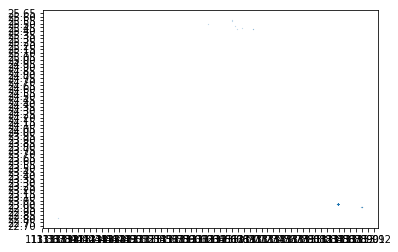

In [274]:
plt.scatter(xy[:,0],xy[:,1],s=0.01)
plt.locator_params(nbins = 100)

In [275]:
def haversine(lonlat1, lonlat2):
    lon1, lat1  = lonlat1
    lon2, lat2= lonlat2
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r *1000


In [276]:
haversine([116.456, 39.921],[116.456, 39.920])

111.19492664426889

In [277]:
Y=[[1.001,2.000],[1.002,2.000],[1.003,2.000],[1.003,2.000]]
squareform(pdist(Y, (lambda u, v: haversine(u, v))))

array([[  0.       , 111.1271897, 222.2543794, 222.2543794],
       [111.1271897,   0.       , 111.1271897, 111.1271897],
       [222.2543794, 111.1271897,   0.       ,   0.       ],
       [222.2543794, 111.1271897,   0.       ,   0.       ]])

In [278]:
X = pd.DataFrame(
        {
         "lng": xy[:,0],
         "lat": xy[:,1]
        })
def clustering_by_dbscan():
    
    distance_matrix = squareform(pdist(X, (lambda u, v: haversine(u, v))))
    # 2代表两公里  
    db = DBSCAN(eps=100, min_samples=5, metric='precomputed')  
    y_db = db.fit_predict(distance_matrix)
    X['cluster'] = y_db
    plt.scatter(X['lng'], X['lat'], c=X['cluster'])
    plt.show()
#X['cluster'].value_counts()


In [279]:
X.head()

,lng,lat
0,113.858667,23.002833
1,113.858667,23.002667
2,113.858833,23.002833
3,113.859000,23.003000
4,113.859000,23.003000


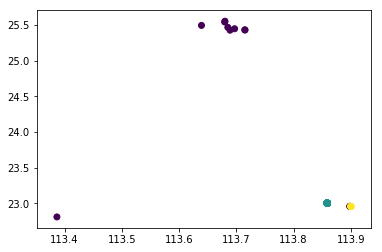

In [280]:
clustering_by_dbscan()

In [281]:
cluster = X['cluster'].value_counts().keys()[0]
cluster

0

In [282]:
 i = 0
# 获取结果最多的簇类型
cluster = X['cluster'].value_counts().keys()[i]
# -1为离群点 无用,选择下一个
if cluster == -1:
    i += 1
    cluster = X['cluster'].value_counts().keys()[i]
cluster

0

In [287]:
X['cluster'].value_counts()


 0    125
-1     11
 1      5
Name: cluster, dtype: int64

In [289]:
len(X[X['cluster'] == -1])

11

In [284]:
X['cluster'].value_counts().values[0]/X.shape[0]

0.8865248226950354

In [306]:
X[X['cluster'] == cluster]['lat'].value_counts()

23.003000    41
23.002667    33
23.002833    23
23.002500    22
23.002333     3
23.003167     2
23.002167     1
Name: lat, dtype: int64

In [314]:
X['count'] = 1
xx = X[X['cluster'] == cluster].groupby(['lat','lng']).sum()

xx

cluster  count
lat       lng                       
23.002167 113.858167        0      1
23.002333 113.858333        0      1
          113.858500        0      2
23.002500 113.858333        0      1
          113.858500        0     11
          113.858667        0     10
23.002667 113.858333        0      8
          113.858667        0     14
          113.858833        0     11
23.002833 113.858167        0      2
          113.858667        0      3
          113.858833        0     10
          113.859000        0      8
23.003000 113.858000        0      2
          113.858833        0      8
          113.859000        0     28
          113.859167        0      3
23.003167 113.859000        0      1
          113.859167        0      1

In [321]:
yy = xx.reset_index()

for item in yy:
    print(item)
yy[yy['count'] == max(yy['count'])]

lat
lng
cluster
count


,lat,lng,cluster,count
15,23.003,113.859,0,28


In [301]:
X[X['cluster'] == cluster]['lng'].mean()

113.8587533048

In [213]:
X[X['cluster'] == cluster]['lat'].mean()

35.0493124625

In [214]:
120.12049999999999,29.338833300000005

(120.12049999999999, 29.338833300000005)

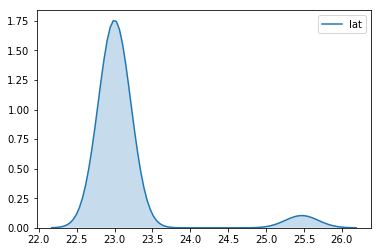

In [290]:
#sns.jointplot(x='lng', y='lat', data=X,)
#sns.kdeplot(X['lng'], shade=True)   
sns.kdeplot(X['lat'], shade=True)   

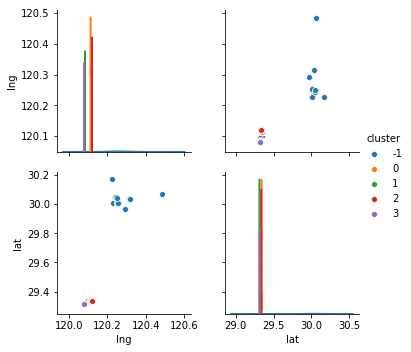

In [113]:
sns.pairplot(X,vars = ['lng','lat'],hue="cluster")

In [80]:
X

,lng,lat,cluster
0,113.858667,23.002833,0
1,113.858667,23.002667,0
2,113.859000,23.003000,0
3,113.858833,23.003000,0
4,113.858833,23.002833,0
5,113.859000,23.003000,0
6,113.859000,23.003000,0
7,113.859000,23.003000,0
8,113.859000,23.003000,0
9,113.859000,23.003000,0
